Data Exploration and Analysis | DSC-530 T301 <br>
Jeremy Barton <br>
07.04.2025

<b>Appendix</b>

[Introduction](#introduction)

[Data Preparation](#data-preparation)

## Introduction

This paper will be analyzing responses from the Central Sensitization Inventory (CSI), consisting of 25 items and the Sensory Processing Sensitivity Questionnaire (SPSQ), consisting of 8 items. According to the Cleavland Clinic, women and people older than 40 are more likely to be diagnoses with fibromyalgia.

The objective is to support the hypothesis that symptoms found in adults 40+ have similar intensity to those responses from individuals 35 and under. Then to predict the responses of participants 35 and under with the responses being the target y These findings can help confirm or not that Fibromyalgia diagnoses have seen an increase in recent decades, or at the very least, the rising prominence in young adults.

### Data Preparation

#### Imports and Preprocessing

Checking the shape of this dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in fibromyalgia questionaire data
response_data = pd.read_csv('data/responses.csv')

csi_keys = pd.read_csv('data/csi/csi_keys.csv')
csi_questions = pd.read_csv('data/csi/csi_questions.csv')

spsq_keys = pd.read_csv('data/spsq/spsq_keys.csv')
spsq_questions = pd.read_csv('data/spsq/spsq_questions.csv')

# Create CSI dataset from fibro_dataset.csv
csi_responses = response_data[['ID','group','sex','age','SES','CSI1','CSI2','CSI3','CSI4','CSI5','CSI6','CSI7','CSI8','CSI9','CSI10','CSI11','CSI12','CSI13','CSI14','CSI15','CSI16','CSI17','CSI18','CSI19','CSI20','CSI21','CSI22','CSI23','CSI24','CSI25']]

print(f"Shape of response dataset:", csi_responses.shape)

Shape of response dataset: (399, 30)


#### Response distribution

Checking the overall distribution of ages in the Control and Fibromyalgia groups.

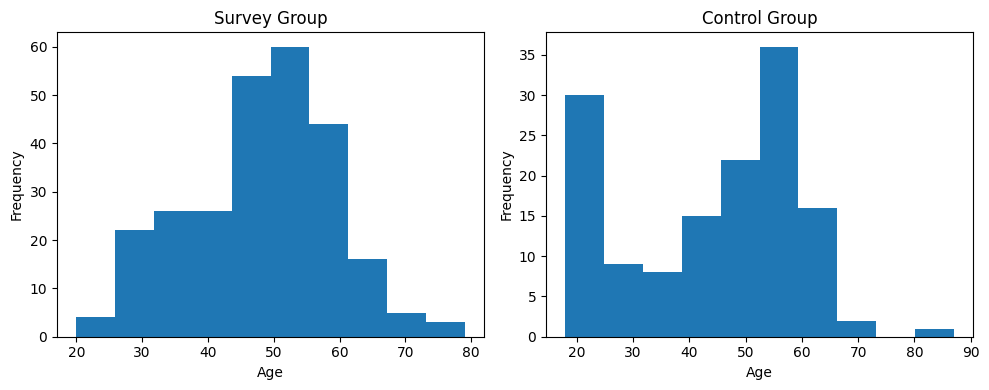

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Control == 1
axes[0].hist(response_data.loc[response_data['group'] == 1, 'age'])
axes[0].set_title('Survey Group')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Control == 0
axes[1].hist(response_data.loc[response_data['group'] == 0, 'age'])
axes[1].set_title('Control Group')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

It looks like the control group was set up according to the typical distribution of Fibromyalgia diagnosis ages. The survey group resembles more of a bell curve, which is good to see.

In [3]:
categories = csi_keys['option'].tolist()
categories

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

This tells us the average response per question by control or experimental group.

### Question and Response EDA

#### Jaw pain analysis

Question 20 of the Central Sensitivity Index is <i>"I have pain in my jaw."</i>, which is a simple enough statement to rate on a scale of Never, Rarely, Often or Always. In the following analysis we explore the age ranges for the five response types.


In [4]:
# Using pandas groupby function

# Get all control females
all_fibro = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1)
]

# Groupby CSI20 and get counts in one step
pain_counts = all_fibro.groupby('CSI20')['ID'].count()
counts = [pain_counts.get(i, 0) for i in range(5)]

# If ever individual dataframes are needed, us this.
# pain_groups = {f'csi20_{i}': group for i, group in all_fibro.groupby('CSI20')}


Now graphing the jaw response data.

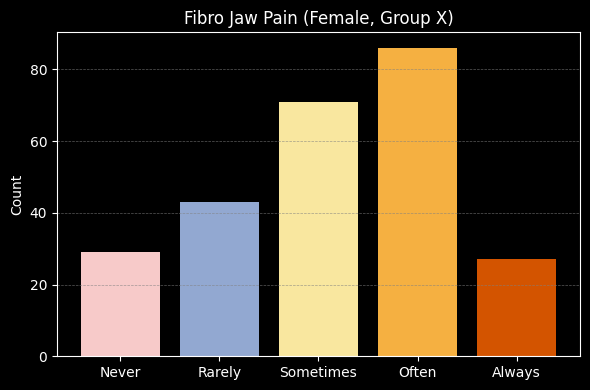

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

In [5]:
labels = csi_keys['option'].tolist()
colors = ['#f7cac9', '#92a8d1', '#f9e79f', '#f5b041', '#d35400']

plt.style.use('dark_background')

# Setting the figure size
fig, ax = plt.subplots(figsize=(6, 4)) # width of 6 in, height of 4

# - Set labels and colors to above definitions 
# - Counts as defined in the previous block 
ax.bar(labels, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Fibro Jaw Pain (Female, Group X)')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

labels


It appears that participants in the experimental group answered "Often" to this question the most. There are a few things we can note about this distribution. It's skewed to the right favoring Often, which one could expect with pain. We'd also like to know the ages of the participants that answered in these categories. In order to do this we will need to change from counting participants to analyzing the mean ages per response type.

This kind of analysis is achievable through the use of a boxplot.

#### Response group age analysis

/tmp/ipykernel_75457/3683583857.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(age_data, labels=labels)


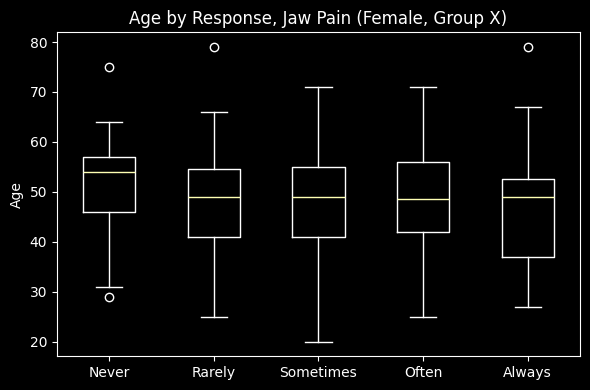

In [14]:
age_data = [all_fibro[all_fibro['CSI20'] == i]['age'].dropna() for i in range(5)]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(age_data, labels=labels)
ax.set_ylabel('Age')
ax.set_title('Age by Response, Jaw Pain (Female, Group X)')
plt.tight_layout()
plt.show()

It appears that the median age for all responses of this symptom is around 50 years old. This could indicate that jaw pain is typically found older iduals with Fibromyalgia. It's worth nothing all but "Never" of the responses reach the twenties at the least.

Another thing to note is whiskers are the longest on "Sometimes", indicating the data for that response is spread out over a wider range.

Let's take a look at CSI question 4: <i>"I grind or clench my teeth"</i>. We know this type of response can affect all ages.

/tmp/ipykernel_75457/2999950085.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(age_data, labels=labels)


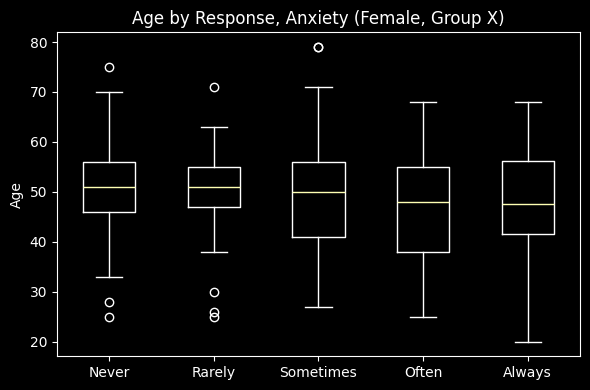

In [13]:
age_data = [all_fibro[all_fibro['CSI4'] == i]['age'].dropna() for i in range(5)]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(age_data, labels=labels)
ax.set_ylabel('Age')
ax.set_title('Age by Response, Anxiety (Female, Group X)')
plt.tight_layout()
plt.show()

As expected, the most severe response covers all age groups, with the median again being around 50 years old. The first quartile of the "Often" response reaches late 30s, but even still the median is 50 and 25% of the participants in this response group are over 55.

Only the "Rarely" response has whiskers that start at 38 and end at 55. Though this response does have outliers that match the shape of its other responses.

#### Finding median Age per Response, per question

If we can find the median age per response per question, it will filter out any questions that have median ages which are not below the age of 35.

In [7]:
# Get median age for each CSI question
csi_columns = [f'CSI{i}' for i in range(1, 26)]  # All 25 questions

median_ages_by_question = {}
for col in csi_columns:
    median_ages_by_question[col] = all_fibro.groupby(col)['age'].median()
    
# View results for each question
for question, medians in median_ages_by_question.items():
    print(f"{question}: {medians.to_dict()}")

CSI1: {0: 49.0, 1: 48.5, 2: 45.0, 3: 52.0, 4: 49.0}
CSI2: {1: 46.0, 2: 65.5, 3: 49.0, 4: 49.0}
CSI3: {0: 57.0, 1: 51.0, 2: 50.0, 3: 47.0, 4: 46.5}
CSI4: {0: 51.0, 1: 51.0, 2: 50.0, 3: 48.0, 4: 47.5}
CSI5: {0: 58.0, 1: 46.0, 2: 52.0, 3: 49.0, 4: 48.0}
CSI6: {0: 55.0, 1: 49.0, 2: 51.0, 3: 48.0, 4: 49.0}
CSI7: {0: 57.0, 1: 43.5, 2: 49.0, 3: 49.5, 4: 51.0}
CSI8: {1: 33.0, 2: 46.0, 3: 50.0, 4: 49.0}
CSI9: {1: 48.0, 2: 46.5, 3: 50.0, 4: 49.5}
CSI10: {0: 71.0, 1: 54.0, 2: 51.5, 3: 48.5, 4: 47.0}
CSI11: {0: 50.5, 1: 49.0, 2: 48.5, 3: 51.0, 4: 48.0}
CSI12: {1: 46.0, 2: 45.0, 3: 50.0, 4: 50.0}
CSI13: {0: 58.0, 1: 59.0, 2: 49.0, 3: 50.0, 4: 47.0}
CSI14: {0: 49.0, 1: 51.0, 2: 51.0, 3: 47.0, 4: 49.0}
CSI15: {1: 57.0, 2: 53.0, 3: 51.0, 4: 48.0}
CSI16: {0: 73.0, 1: 55.0, 2: 51.0, 3: 48.0, 4: 47.5}
CSI17: {2: 51.0, 3: 49.0, 4: 49.0}
CSI18: {1: 55.5, 2: 51.0, 3: 50.5, 4: 49.0}
CSI19: {0: 51.0, 1: 50.5, 2: 50.0, 3: 49.0, 4: 45.0}
CSI20: {0: 54.0, 1: 49.0, 2: 49.0, 3: 48.5, 4: 49.0}
CSI21: {0: 33.0, 1: 4

Now taking a look at all questions in the CSI survey, the same analysis will be ran.